In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd

#Pemodelan
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn .preprocessing import MinMaxScaler

#Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATA

In [ ]:
d_transaksi = pd.read_csv("/content/gdrive/MyDrive/Data Sheet/Case Study - Transaction.csv", delimiter=';')
d_transaksi.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [ ]:
d_cs= pd.read_csv("/content/gdrive/MyDrive/Data Sheet/Case Study - Customer.csv", delimiter=";")
d_cs.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [ ]:
d_produk = pd.read_csv("/content/gdrive/MyDrive/Data Sheet/Case Study - Product.csv", delimiter=";")
d_produk.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [ ]:
d_store = pd.read_csv("/content/gdrive/MyDrive/Data Sheet/Case Study - Store.csv", delimiter=";")
d_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


# DATA CLEANSING

In [ ]:
data_info = [d_transaksi, d_cs, d_produk, d_store]

for i in data_info:
  display(i.info())
  print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


None

In [ ]:
d_transaksi['Date'] = pd.to_datetime(d_transaksi['Date'])

<ipython-input-8-b2e2662d21a2>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  d_transaksi['Date'] = pd.to_datetime(d_transaksi['Date'])


In [ ]:
d_cs['Income'] = d_cs['Income'].str.replace(',', '').astype(int)

# DATA MERGE

In [ ]:
merged_data = pd.merge(d_transaksi, d_cs, on='CustomerID')
merged_data = pd.merge(merged_data, d_produk, on='ProductID')
merged_data = pd.merge(merged_data, d_store, on='StoreID')

In [ ]:
merged_data.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,1053,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,18,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,436,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,474,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,994,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"


# AGREGASI

In [ ]:
# Groupby CustomerID dan melakukan aggregasi
aggregated_data = merged_data.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

In [ ]:
aggregated_data.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


# KMEANS CLUSTERING

In [ ]:
X = aggregated_data["CustomerID"]

In [ ]:
aggregated_data.drop("CustomerID", axis=1, inplace=True)

In [ ]:
aggregated_data.head()

,TransactionID,Qty,TotalAmount
0,17,60,623300
1,13,57,392300
2,15,56,446200
3,10,46,302500
4,7,27,268600


In [ ]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(aggregated_data)
data_scaled = pd.DataFrame(x_scaled,columns=['TransactionID','Qty','TotalAmount'])
data_scaled

,TransactionID,Qty,TotalAmount
0,0.777778,0.724638,0.703949
1,0.555556,0.681159,0.397827
2,0.666667,0.666667,0.469255
3,0.388889,0.521739,0.278823
4,0.222222,0.246377,0.233899
...,...,...,...
442,0.722222,0.710145,0.520806
443,0.833333,0.753623,0.643520
444,0.833333,0.840580,0.656109
445,0.444444,0.463768,0.438908


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

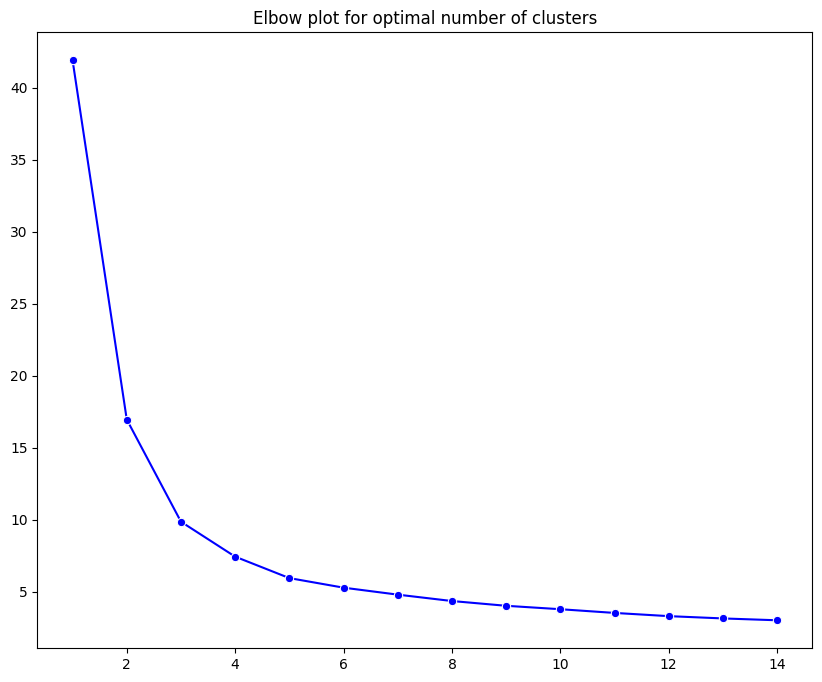

In [ ]:
wscc = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(data_scaled)
    wscc.append(kmeans.inertia_)

plt.figure(figsize=(10,8))
sns.lineplot(x=range(1,15),y=wscc,marker="o",c='blue')
plt.title("Elbow plot for optimal number of clusters")

Berdasarkan Elbow Method, jumlah cluster yang sesuai adalah 3 Cluster.

In [ ]:
cluster = KMeans(n_clusters=3, random_state = 42)
cluster_labels = cluster.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Membuat kolom baru berdasarkan hasil clustering
segment = pd.Series(cluster.labels_, name="segment")

In [ ]:
# Menggabungkan data dengan hasil cluster
results = pd.concat([aggregated_data, segment], axis=1)
results.head()

,TransactionID,Qty,TotalAmount,segment
0,17,60,623300,0
1,13,57,392300,0
2,15,56,446200,0
3,10,46,302500,1
4,7,27,268600,2


In [ ]:
results = pd.concat([X, results], axis=1)
results.head()

,CustomerID,TransactionID,Qty,TotalAmount,segment
0,1,17,60,623300,0
1,2,13,57,392300,0
2,3,15,56,446200,0
3,4,10,46,302500,1
4,5,7,27,268600,2


# EDA

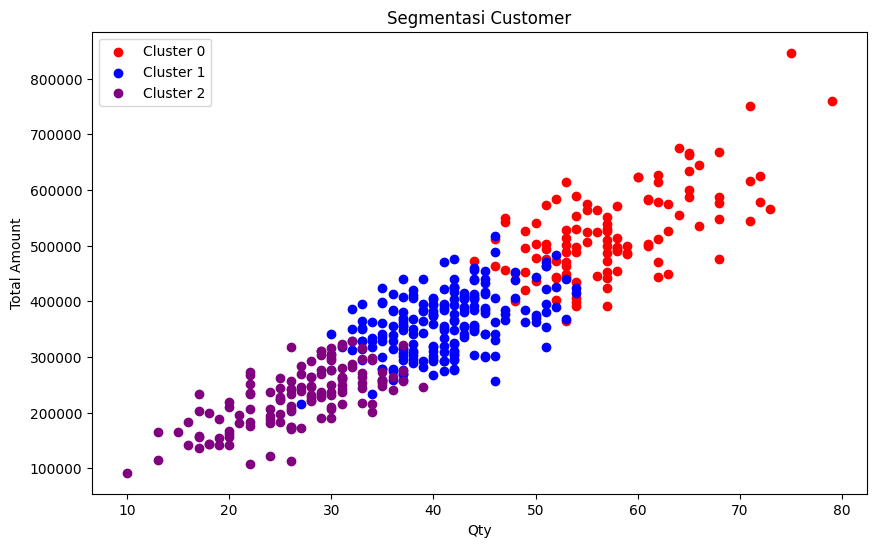

In [ ]:
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'purple']

for cluster_num, color in zip(range(3), colors):
    cluster_points = results[results['segment'] == cluster_num]  # Use cluster_num here
    plt.scatter(cluster_points['Qty'], cluster_points['TotalAmount'], color=color, label=f'Cluster {cluster_num}')

plt.xlabel('Qty')
plt.ylabel('Total Amount')
plt.title('Segmentasi Customer')
plt.legend()
plt.show()


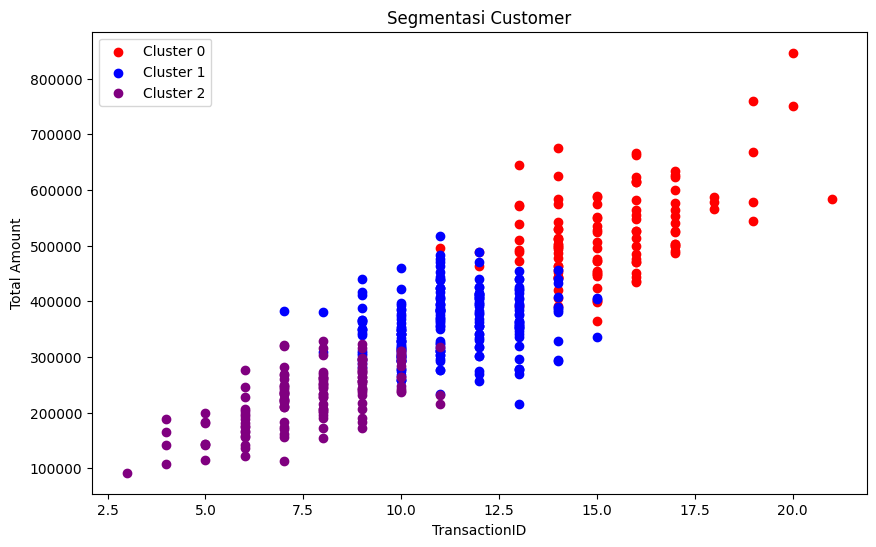

In [ ]:
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'purple']

for cluster_num, color in zip(range(3), colors):
    cluster_points = results[results['segment'] == cluster_num]  # Use cluster_num here
    plt.scatter(cluster_points['TransactionID'], cluster_points['TotalAmount'], color=color, label=f'Cluster {cluster_num}')

plt.xlabel('TransactionID')
plt.ylabel('Total Amount')
plt.title('Segmentasi Customer')
plt.legend()
plt.show()


# KESIMPULAN


Hasil clustering untuk Customer Segmentation :


1.   Cluster 0 (GOLD)
<br>
      Cluster ini merupakan kelompok pelanggan yang sangat sering melakukan transaksi dengan Kuantitas tinggi, dan Total transaksi Tinggi.
2.   Cluster 1 (SILVER)
<br>
     Cluster ini merupakan kelompok pelanggan yang cukup sering melakukan transaksi dengan kuantitas sedang, dan Total transaksi sedang.
3.   Cluster 2 (BRONZE)
<br>
     Cluster ini merupakan kelompok pelanggan yang jarang melakukan pembelian dengan kuantitas rendah, dan Total transaksi rendah.

